 # 1 Chargement des données

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from os import listdir
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
import cv2
from sklearn import cluster, metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import manifold, decomposition



import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout 
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import time


C:\Users\serge\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\serge\anaconda3\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
C:\Users\serge\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\serge\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
df = pd.read_csv("Flipkart/flipkart_com-ecommerce_sample_1050.csv")


In [4]:
df.head(1)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."


Je récupére les catégories du 1er niveau 

In [5]:
# creation categorie
df['categorie'] = df.product_category_tree.apply(lambda x : x.split('>>')[0][2:].strip() )
df['categorie'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

In [6]:
# dataframe de travail
df_=df[['product_name','categorie','image','description']]

In [7]:
# LabelEncoder pour valeur numérique de catégorie
le = LabelEncoder()
df_["cat_num"]=le.fit_transform(df_["categorie"])

df_[['cat_num','categorie']].sample(10)

<ipython-input-7-4a19050b81f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_["cat_num"]=le.fit_transform(df_["categorie"])


,cat_num,categorie
642,0,Baby Care
878,4,Home Furnishing
47,2,Computers
362,1,Beauty and Personal Care
185,5,Kitchen & Dining
593,0,Baby Care
218,5,Kitchen & Dining
480,2,Computers
157,5,Kitchen & Dining
604,2,Computers


In [8]:

path = r"C:\Users\serge\OneDrive\Documents\Documents\DATA SCIENTIST\P6\Flipkart\Images"

df_['image_path'] = path+'\\'+df_['image']
data = pd.DataFrame()
data["image_path"] = df_.image_path
data["label_name"] = df_['cat_num'] 


<ipython-input-8-ba9c8be6be35>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['image_path'] = path+'\\'+df_['image']


In [9]:
df_.head(5)

,product_name,categorie,image,description,cat_num,image_path
0,Elegance Polyester Multicolor Abstract Eyelet ...,Home Furnishing,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,4,C:\Users\serge\OneDrive\Documents\Documents\DA...
1,Sathiyas Cotton Bath Towel,Baby Care,7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,0,C:\Users\serge\OneDrive\Documents\Documents\DA...
2,Eurospa Cotton Terry Face Towel Set,Baby Care,64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,0,C:\Users\serge\OneDrive\Documents\Documents\DA...
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Home Furnishing,d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,4,C:\Users\serge\OneDrive\Documents\Documents\DA...
4,Jaipur Print Cotton Floral King sized Double B...,Home Furnishing,6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,4,C:\Users\serge\OneDrive\Documents\Documents\DA...


104
Home Furnishing categorie : 4
-------


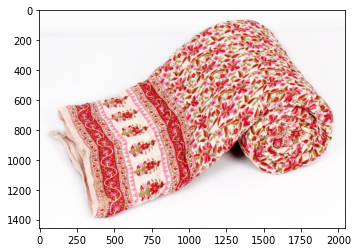

(2043, 1455)
456
Kitchen & Dining categorie : 5
-------


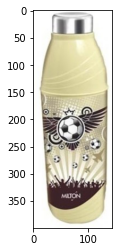

(145, 400)
231
Home Decor & Festive Needs categorie : 3
-------


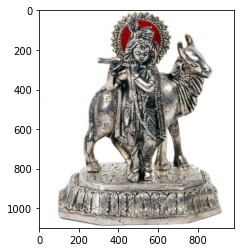

(985, 1100)
845
Computers categorie : 2
-------


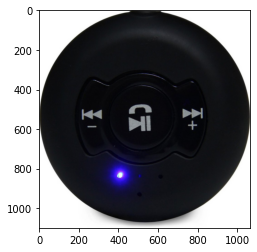

(1068, 1100)
763
Watches categorie : 6
-------


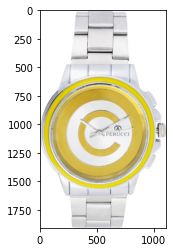

(1111, 1908)


In [10]:
# affichage aléatoire de 5 images avec la catégorie et la taille de l'image

from matplotlib.image import imread
from random import *

for n in range(5):
    i=randint(1,df_.shape[0])
    print(i)
    print(df_.iloc[i-1,1],"categorie :", df_.iloc[i-1,4])
    print("-------")
    filename =df_['image_path'][i-1]
    #print(filename)
    #print(df_['image_path'][i])
    image = imread(filename)
    plt.imshow(image)
    plt.show()
    print(image.shape[1::-1])

### 1.2 Affichage d'exemples d'images par label

In [11]:
list_labels=df_.categorie.unique().tolist()
list_photos=df_["image_path"].tolist()


Home Furnishing


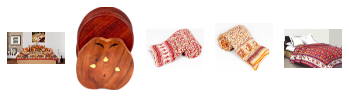

Baby Care


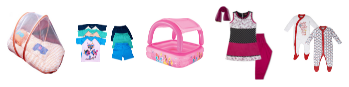

Watches


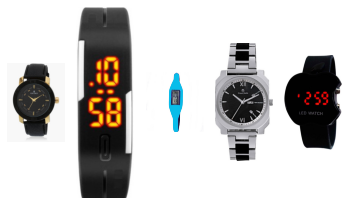

Home Decor & Festive Needs


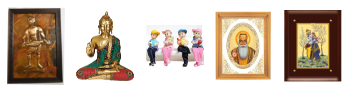

Kitchen & Dining


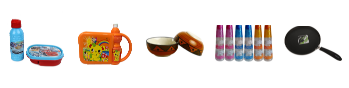

Beauty and Personal Care


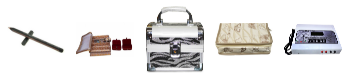

Computers


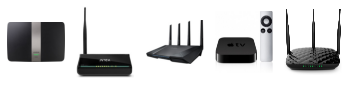

In [12]:
def list_fct(name) :
    list_image_name = [list_photos[i] for i in range(len(df_)) if df_["categorie"][i]==name]
    return list_image_name

list_cat_0=[list_photos[i] for i in range(len(df_)) if df_["categorie"][i]=='Baby Care']
list_cat_1=[list_photos[i] for i in range(len(df_)) if df_["categorie"][i]=='Beauty and Personal Care']
list_cat_2=[list_photos[i] for i in range(len(df_)) if df_["categorie"][i]=='Computers']
list_cat_3=[list_photos[i] for i in range(len(df_)) if df_["categorie"][i]=="Home Decor & Festive Needs"]
list_cat_4=[list_photos[i] for i in range(len(df_)) if df_["categorie"][i]=='Home Furnishing']
list_cat_5=[list_photos[i] for i in range(len(df_)) if df_["categorie"][i]=="Kitchen & Dining"]
list_cat_6=[list_photos[i] for i in range(len(df_)) if df_["categorie"][i]=="Watches"]

for name in list_labels :
    print(name)
    # print("-------")
    for i in range(5):
        plt.subplot(150+1 + i)
        filename = list_fct(name)[i+10]
        image = imread(filename)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

##  Etape 1 : étude de faisabilité

### 2.1  Création du modèle pré-entraîné

In [31]:
base_model = VGG16()
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Création des features des images à partir du modèle pré-entrainé VGG16

In [33]:
images_features = []
i=0 
for image_file in data["image_path"] :
    if i%100 == 0 : print(i)
    i +=1
    image = load_img(image_file, target_size=(224, 224))
    image = img_to_array(image) 
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    images_features.append(model.predict(image, verbose=0)[0]) # predict from pretrained model

images_features = np.asarray(images_features)
print('Nombre de descripteurs VGG :',images_features.shape )

0
100
200
300
400
500
600


C:\Users\serge\anaconda3\lib\site-packages\PIL\Image.py:2855: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


700
800
900
1000
Nombre de descripteurs VGG : (1050, 4096)


### 2.2 Réduction dimension et analyse

In [34]:
print(images_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(images_features)
print(feat_pca.shape)

(1050, 4096)
(1050, 803)


### 2.3 Réduction de dimension T-SNE et affichage des images selon vraies classes

In [35]:
temps1 = time.time()

tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=1234)
X_tsne = tsne.fit_transform(feat_pca)

duration1=time.time()-temps1
print("temps de T-SNE : ", "%15.2f" % duration1, "secondes")

temps de T-SNE :             8.29 secondes


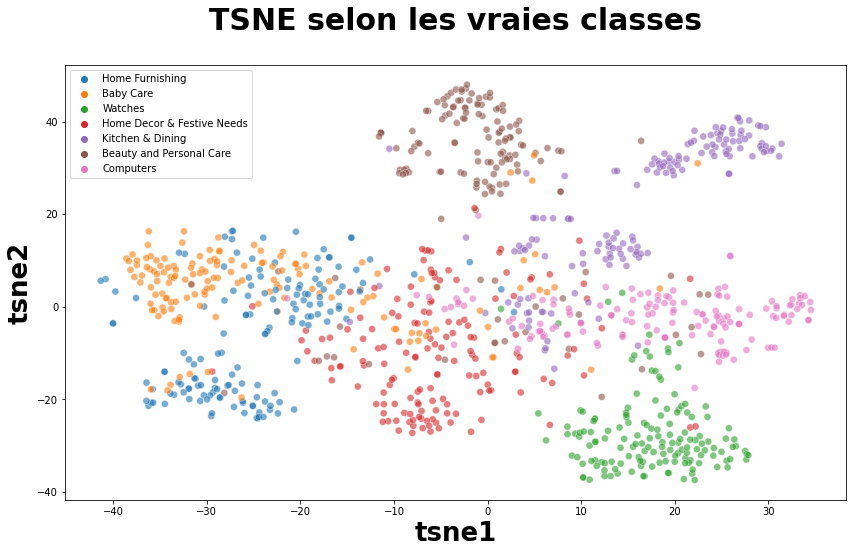

In [41]:
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne["class"] = df_["categorie"]

plt.figure(figsize=(14,8))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="class",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 10}) 
plt.savefig('TSNE_classe.jpeg')
plt.show()


### 2.4 Création de clusters à partir du T-SNE et affichage des images selon clusters
* Il s'agit de réaliser une mesure de l'ARI afin de conforter l'analyse graphique précédente qui démontre la faisabilité de réaliser ultérieurement une classification supervisée. Cette mesure de l'ARI nécessite de créer des clusters théoriques via KMeans

In [37]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, n_init=100)
cls.fit(X_tsne)

KMeans(n_clusters=7, n_init=100)

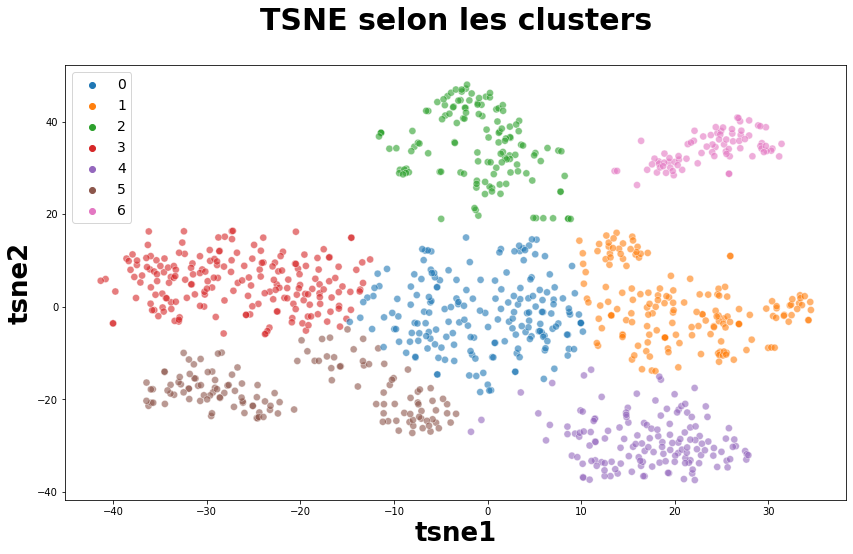

ARI :  0.4482725638250802


In [40]:
df_tsne["cluster"] = cls.labels_

plt.figure(figsize=(14,8))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 
plt.savefig('TSNE_cluster.jpeg')
plt.show()

labels = df_["cat_num"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

* L'analyse graphique montre visuellement qu'il est réalisable de séparer automatiquement les images selon leurs vraies classes
* Ceci suffit à démontrer la faisabilité de réaliser ultérieurement une classification supervisée pour déterminer automatiquement les classes des images


### 2.5 Analyse par classe

In [31]:
# matrice de confusion
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[  9   1  26   1 109   3   1]
 [  5   1  13   1   5 117   8]
 [  0   0  38   1   1   1 109]
 [ 58   0  75   8   3   1   5]
 [ 66   0   4   0  80   0   0]
 [  0  78  31   0   0  10  31]
 [  0   0   2 135   0   0  13]]


In [32]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters : ", corresp)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

In [33]:
cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [4 5 3 6 0 1 2]
[[109   3   1  26   9   1   1]
 [  5 117   8  13   5   1   1]
 [  1   1 109  38   0   0   1]
 [  3   1   5  75  58   0   8]
 [ 80   0   0   4  66   0   0]
 [  0  10  31  31   0  78   0]
 [  0   0  13   2   0   0 135]]

              precision    recall  f1-score   support

           0       0.55      0.73      0.63       150
           1       0.89      0.78      0.83       150
           2       0.65      0.73      0.69       150
           3       0.40      0.50      0.44       150
           4       0.48      0.44      0.46       150
           5       0.97      0.52      0.68       150
           6       0.92      0.90      0.91       150

    accuracy                           0.66      1050
   macro avg       0.69      0.66      0.66      1050
weighted avg       0.69      0.66      0.66      1050



<Axes: >

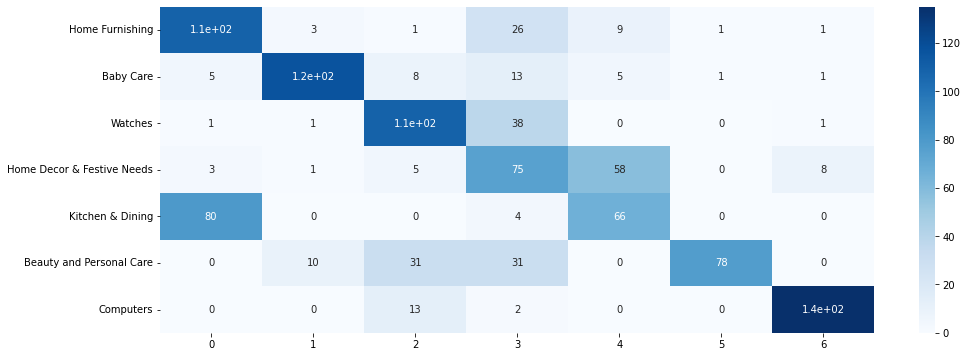

In [34]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in df_['categorie'].unique()],
                  columns = [i for i in range(7)])
plt.figure(figsize = (16,6))
sns.heatmap(df_cm, annot=True, cmap="Blues")

* La classe la moins bien prédite est "Kitchen & dining" .Beaucoup d'objets de la classe ont des similitudes avec des objets de la classe Home Furnishing

## 3 Détermination et affichage des descripteurs SIFT

#### quelques exemples avec la librairie CV2

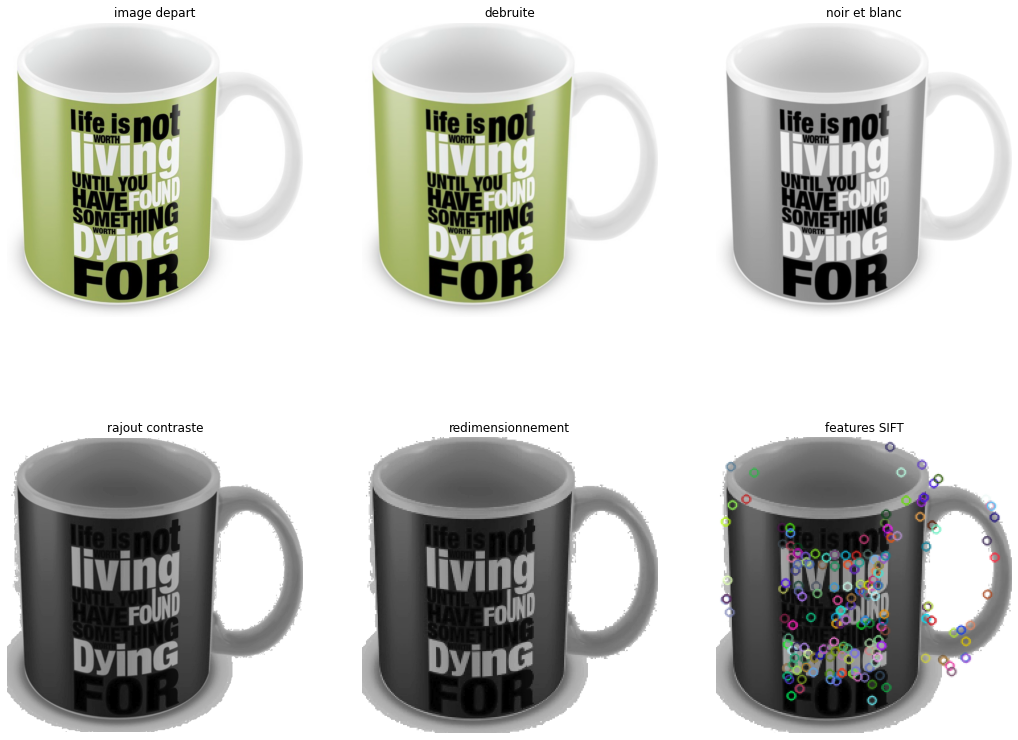

Descripteurs :  (211, 128)

[[ 22.   0.   0. ...   0.   0.   0.]
 [ 34.   1.   0. ...   0.   0.   0.]
 [ 19.   0.   0. ...   0.   0.   1.]
 ...
 [120.  16.   0. ...   0.   0.   0.]
 [ 59.  20.   0. ...   0.   0.   7.]
 [ 25.   0.   0. ...   0.   0.   1.]]


In [42]:
sift = cv2.SIFT_create(500)
image = cv2.imread(list_photos[50])

plt.figure(figsize=(18, 14))

plt.subplot(2,3,1)
plt.axis('off')
plt.title('image depart')
plt.imshow(image)

plt.subplot(2,3,2)
#retirer le bruit
image = cv2.GaussianBlur(image, (5, 5), 0)
plt.axis('off')
plt.title('debruite')
plt.imshow(image)

#niveaux de gris
plt.subplot(2,3,3)
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.title('noir et blanc')
plt.imshow(gray_img,cmap='gray')

#augmentation du contraste par égalisation
plt.subplot(2,3,4)
image = cv2.equalizeHist(gray_img)   # equalize image histogram
plt.axis('off')
plt.title('rajout contraste')
plt.imshow(image, cmap='gray')

#normaliser en redimensionnant image
plt.subplot(2,3,5)
dsize = (224, 224)
image = cv2.resize(image, dsize)
plt.axis('off')
plt.title('redimensionnement')
plt.imshow(image, cmap='gray')

#detection feature SIFT
plt.subplot(2,3,6)
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,gray_img)
plt.axis('off')
plt.title('features SIFT')
plt.imshow(img)

plt.savefig('P01_07_traitementImages.jpg')
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

autre exemple d' affichage des descripteurs SIFT avec drawKeypoints couleur= bleue  et flags = RAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS 

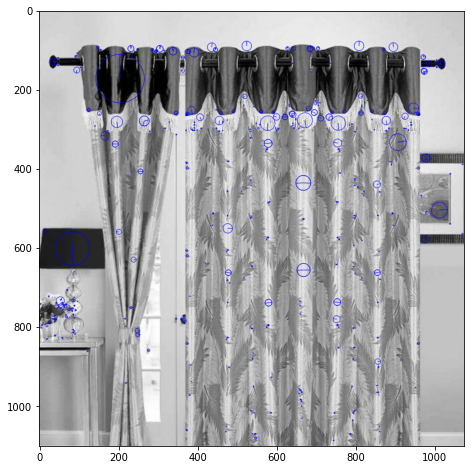

Descripteurs :  (501, 128)

[[ 83.  35.   6. ...   1.   4.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [ 58.  34.   0. ...   0.   0.   0.]
 ...
 [  1.   0.   0. ...   0.   5.   0.]
 [ 36.  26.  18. ...   7.   0.   1.]
 [127.  16.   0. ...  30.  17.   4.]]


In [43]:
plt.figure(figsize=(14,8))
# recherche descripteurs 
sift = cv2.SIFT_create(500)
image = cv2.imread(list_photos[1020]) # convert in gray
gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image = cv2.equalizeHist(gray)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img = cv2 . drawKeypoints (gray,kp , image ,(0,0,255), flags = cv2 . DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ) 
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)


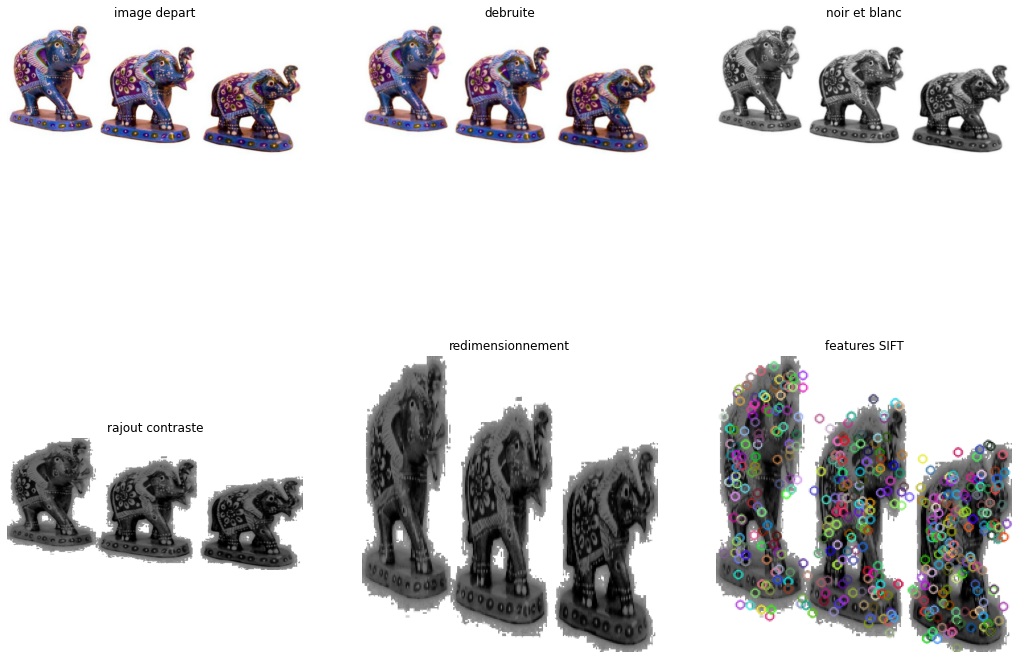

Descripteurs :  (456, 128)

[[ 62.   3.   0. ...   0.   5.  17.]
 [ 11.  59.  49. ...   0.   0.   1.]
 [  9.  40.  26. ...   0.   0.   0.]
 ...
 [125.   5.   0. ...   0.   0.   8.]
 [  2.   1.   1. ...   0.   0.   0.]
 [ 44.  13.   4. ...   0.   0.   0.]]


In [44]:
sift = cv2.SIFT_create(500)
image = cv2.imread(list_photos[214])

plt.figure(figsize=(18, 14))

plt.subplot(2,3,1)
plt.axis('off')
plt.title('image depart')
plt.imshow(image)

plt.subplot(2,3,2)
#retirer le bruit
image = cv2.GaussianBlur(image, (5, 5), 0)
plt.axis('off')
plt.title('debruite')
plt.imshow(image)

#niveaux de gris
plt.subplot(2,3,3)
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.title('noir et blanc')
plt.imshow(gray_img,cmap='gray')

#augmentation du contraste par égalisation
plt.subplot(2,3,4)
image = cv2.equalizeHist(gray_img)   # equalize image histogram
plt.axis('off')
plt.title('rajout contraste')
plt.imshow(image, cmap='gray')

#normaliser en redimensionnant image
plt.subplot(2,3,5)
dsize = (224, 224)
image = cv2.resize(image, dsize)
plt.axis('off')
plt.title('redimensionnement')
plt.imshow(image, cmap='gray')

#detection feature SIFT
plt.subplot(2,3,6)
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,gray_img)
plt.axis('off')
plt.title('features SIFT')
plt.imshow(img)

plt.savefig('P01_07_traitementImages.jpg')
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

### 3.1 Pré-traitement des images via SIFT

#### 3.1.1 Création des descripteurs 
* Pour chaque image
* débruitage
* passage en gris 
* equalisation
* redimensionnement de l'image
* création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [45]:
# identification of key points and associated descriptors
import time
sift_keypoints = []
temps1=time.time()
sift = cv2.SIFT_create()

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(list_photos[image_num])
    image = cv2.GaussianBlur(image, (5, 5), 0)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)# convert in gray
    image = cv2.resize(image, (224, 224))  # redimensionne
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000


<ipython-input-45-a8809807e95d>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sift_keypoints_by_img = np.asarray(sift_keypoints)



Nombre de descripteurs :  (347152, 128)
temps de traitement SIFT descriptor :            38.22 secondes


#### 3.1.2 Création des clusters de descripteurs¶

In [46]:
# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=1234,n_init='auto')
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  589
Création de 589 clusters de descripteurs ...
temps de traitement kmeans :             3.23 secondes


#### 3.1.3 Création des features des images
 Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

Features d'une image = Histogramme d'une image = Comptage pour une image du nombre de descripteurs par cluster

In [47]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             1.84 secondes


### 3.2 Réduction de dimension


#### 3.2.1  Réduction de dimension PCA
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [48]:
print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 589)
Dimensions dataset après réduction PCA :  (1050, 475)


#### 3.2.2 Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  1050 non-null   object
 1   label_name  1050 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 12.4+ KB


In [50]:
tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=1234)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = df_["categorie"]
print(df_tsne.shape)


(1050, 3)


## 3.3 Analyse visuelle : affichage T-SNE selon catégories d'images

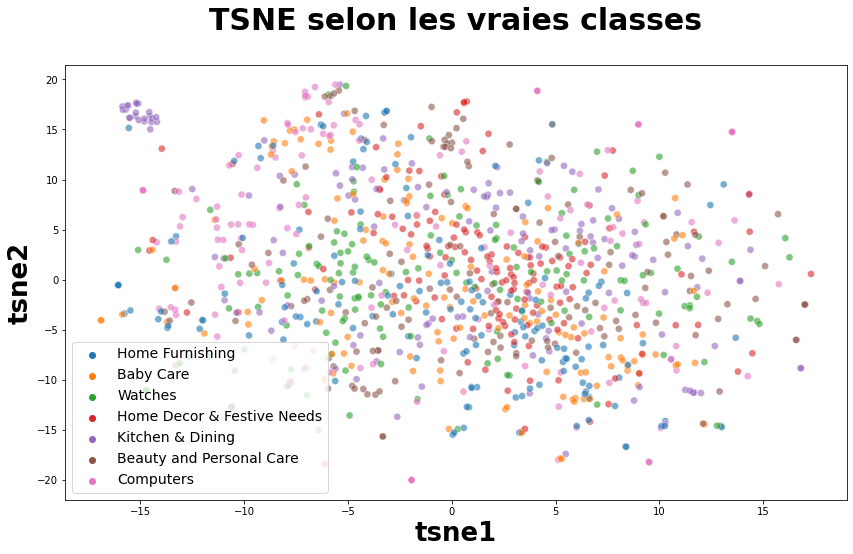

In [56]:
df_tsne["class"] = df_["categorie"]
plt.figure(figsize=(14,8))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


## 3.4 Analyse mesures : similarité entre catégories et clusters

In [52]:
#####  Création de clusters à partir du T-SNE

In [53]:
cls = cluster.KMeans(n_clusters=7, random_state=123)
cls.fit(X_tsne)

 
print(df_tsne.shape)


(1050, 3)


C:\Users\serge\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#####  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters

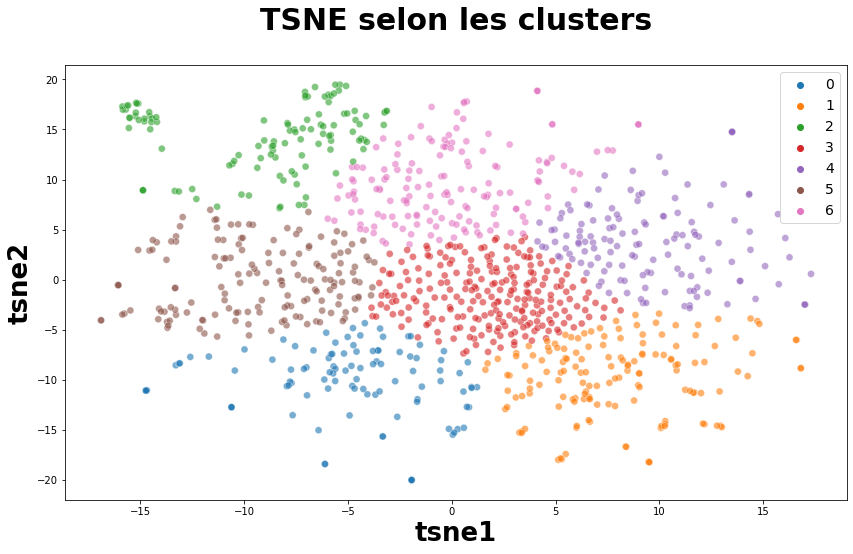

ARI :  0.03428293217186819


In [54]:
df_tsne["cluster"] = cls.labels_

plt.figure(figsize=(14,8))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = df_['categorie']
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))